In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.utils import img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
train_images = "/content/drive/MyDrive/dataset/chest_xray/train"
test_images="/content/drive/MyDrive/dataset/chest_xray/test"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


In [5]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator=train_datagen.flow_from_directory(test_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
history = model.fit(train_generator, epochs =15, validation_data = validation_generator)

Epoch 1/15
41/41 [==============================] - 1019s 25s/step - loss: 0.5550 - accuracy: 0.7573 - val_loss: 0.5240 - val_accuracy: 0.7500
Epoch 2/15
40/41 [============================>.] - ETA: 3s - loss: 0.3136 - accuracy: 0.8689

In [ ]:
score = model.evaluate(train_generator)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model.evaluate(test_generator)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

41/41 [==============================] - 170s 4s/step - loss: 0.1238 - accuracy: 0.9536
Train Loss:  0.12380169332027435
Train Accuracy:  0.9536042809486389
5/5 [==============================] - 360s 89s/step - loss: 0.2928 - accuracy: 0.8974

Test loss:  0.29284027218818665
Test Accuracy:  0.8974359035491943


Text(0.5, 1.0, 'Accuracy Evolution')

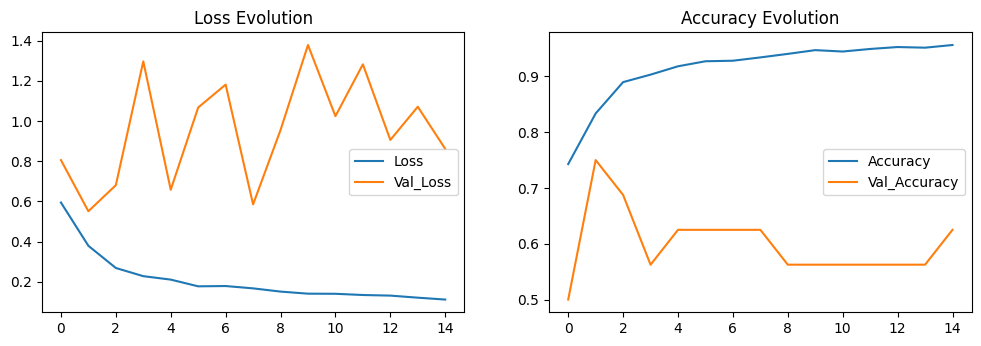

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_generator)
y_pred = y_pred.round()
y_true = test_generator.classes
print(classification_report(y_true,y_pred))

5/5 [==============================] - 19s 4s/step
              precision    recall  f1-score   support

           0       0.41      0.35      0.38       234
           1       0.64      0.69      0.67       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.56      0.56       624



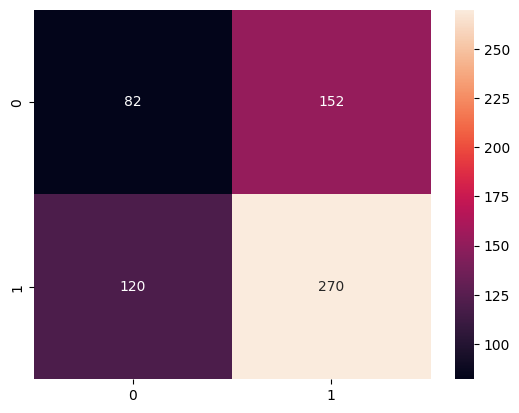

In [ ]:
import seaborn as sns
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True, fmt='g')
plt.show()

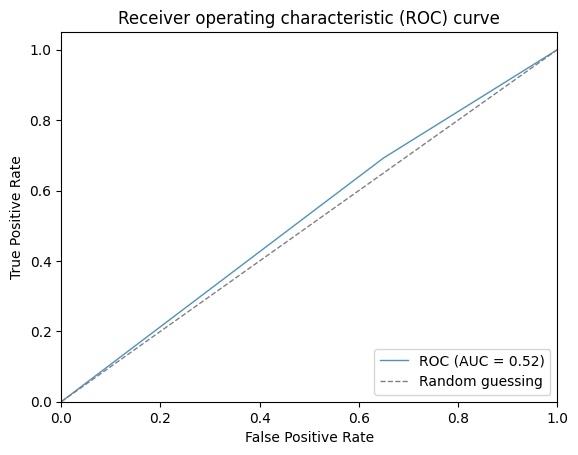

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('cnn.h5')

In [ ]:
final_model = tf.keras.models.load_model('cnn.h5')

In [ ]:
final_model.evaluate(test_generator)

5/5 [==============================] - 19s 4s/step - loss: 0.2869 - accuracy: 0.8958


[0.28685620427131653, 0.8958333134651184]

1/1 [==============================] - 0s 29ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

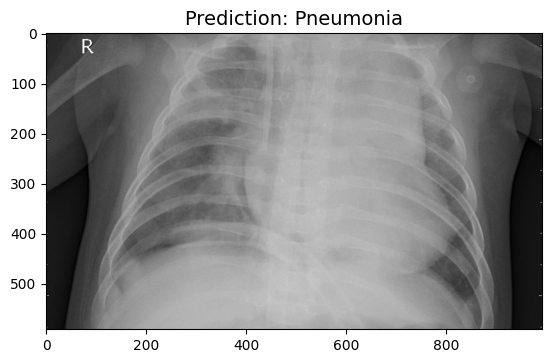

In [ ]:
img= cv2.imread('/content/drive/MyDrive/dataset/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
final_model.predict(img)
prediction = final_model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)